# Seoul Bike Sharing Demand Prediction - Machine Learning Analysis

**Dataset:** Seoul Bike Sharing Demand Dataset



## Part A: Data Loading

This section loads the Seoul Bike Sharing dataset into a pandas DataFrame for analysis.

In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuring plotting settings for better visualizations
sns.set_palette('husl')
%matplotlib inline

In [15]:
# Loading the Seoul Bike Sharing dataset from CSV file
df = pd.read_csv('data/SeoulBikeData.csv', encoding='unicode_escape')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape (rows, columns):", df.shape) # Displays basic information about the dataset
print("\nColumn names and data types:")
print(df.dtypes)

First 5 rows of the dataset:
   Date         Rented Bike Count   Hour   Temperature(ï¿½C)   Humidity(%)  \
0  01/12/2017                 254      0                -5.2            37   
1  01/12/2017                 204      1                -5.5            38   
2  01/12/2017                 173      2                -6.0            39   
3  01/12/2017                 107      3                -6.2            40   
4  01/12/2017                  78      4                -6.0            36   

    Wind speed (m/s)   Visibility (10m)   Dew point temperature(ï¿½C)  \
0                2.2               2000                         -17.6   
1                0.8               2000                         -17.6   
2                1.0               2000                         -17.7   
3                0.9               2000                         -17.6   
4                2.3               2000                         -18.6   

    Solar Radiation (MJ/m2)   Rainfall(mm)   Snowfall (cm)   Se

## Part B: Exploratory Data Analysis (EDA)

### B.1: Dataset Overview and Basic Statistics

In [ ]:
# identifying data types, non-null counts, and memory usage
print("Dataset Information:")
print(df.info())

# Checking for missing values in columns
print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         8760 non-null   object 
 1   Rented Bike Count            8760 non-null   int64  
 2   Hour                         8760 non-null   int64  
 3   Temperature(ï¿½C)            8760 non-null   float64
 4   Humidity(%)                  8760 non-null   int64  
 5   Wind speed (m/s)             8760 non-null   float64
 6   Visibility (10m)             8760 non-null   int64  
 7   Dew point temperature(ï¿½C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)      8760 non-null   float64
 9   Rainfall(mm)                 8760 non-null   float64
 10  Snowfall (cm)                8760 non-null   float64
 11  Seasons                      8760 non-null   object 
 12  Holiday                      8760 non-null   object 
 1

In [22]:
# Statistical summary of numerical features
# Mean, std, min, max and quartiles
print("Statistical Summary of Numerical Features:")
print(df.describe())

# displaing summary statistics with additional percentiles
print("\nDetailed Statistical Summary (with additional percentiles):")
print(df.describe(percentiles=[.1, .25, .5, .75, .9, .95, .99]))

Statistical Summary of Numerical Features:
       Rented Bike Count         Hour  Temperature(ï¿½C)  Humidity(%)  \
count        8760.000000  8760.000000        8760.000000  8760.000000   
mean          704.602055    11.500000          12.882922    58.226256   
std           644.997468     6.922582          11.944825    20.362413   
min             0.000000     0.000000         -17.800000     0.000000   
25%           191.000000     5.750000           3.500000    42.000000   
50%           504.500000    11.500000          13.700000    57.000000   
75%          1065.250000    17.250000          22.500000    74.000000   
max          3556.000000    23.000000          39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(ï¿½C)  \
count       8760.000000       8760.000000                  8760.000000   
mean           1.724909       1436.825799                     4.073813   
std            1.036300        608.298712                    13.060369   
min

In [23]:
# Analyzing categorical features
# Understanding unique values helps in encoding feature analysing
print("Categorical Features Analysis:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Categorical Features Analysis:

Date:
Date
01/12/2017    24
02/12/2017    24
03/12/2017    24
04/12/2017    24
05/12/2017    24
              ..
26/11/2018    24
27/11/2018    24
28/11/2018    24
29/11/2018    24
30/11/2018    24
Name: count, Length: 365, dtype: int64

Seasons:
Seasons
Spring     2208
Summer     2208
Autumn     2184
Winter     2160
Name: count, dtype: int64

Holiday:
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

Functioning Day:
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


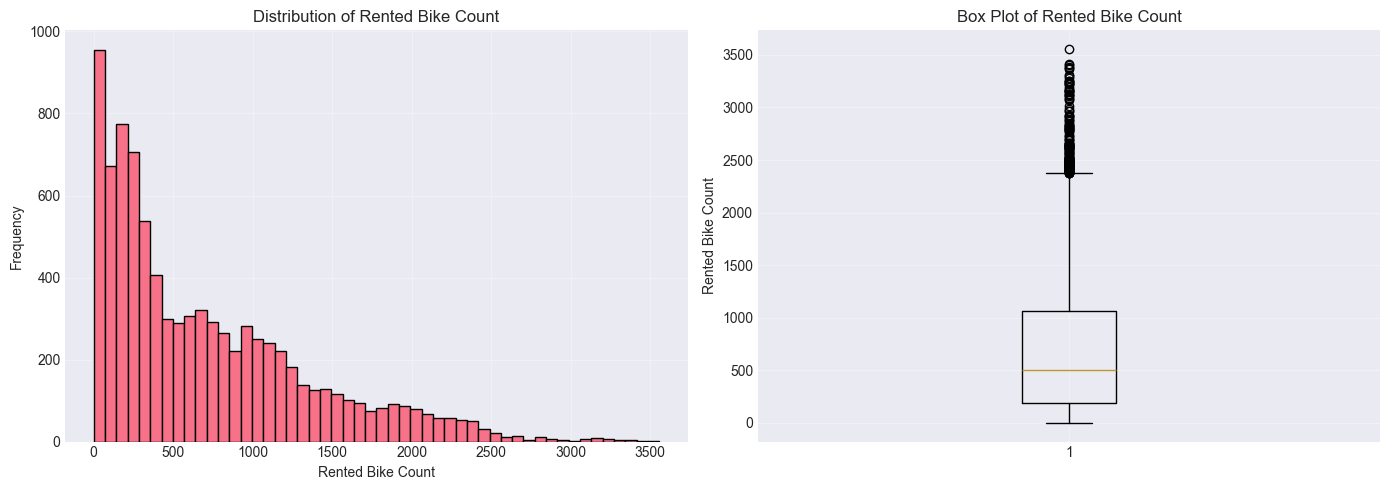

Skewness: 1.15
Kurtosis: 0.85


In [25]:
# analyzing the target variable distribution (Rented Bike Count)
# target distribution will be necessary for model selection
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram shows the frequency distribution
axes[0].hist(df['Rented Bike Count'], bins=50, edgecolor='black')
axes[0].set_xlabel('Rented Bike Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Rented Bike Count')
axes[0].grid(True, alpha=0.3)

# Box plot helps to identify outliers and quartiles
axes[1].boxplot(df['Rented Bike Count'])
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Box Plot of Rented Bike Count')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis
# Skewness indicates asymmetry; Kurtosis indicates tail heaviness
print(f"Skewness: {df['Rented Bike Count'].skew():.2f}")
print(f"Kurtosis: {df['Rented Bike Count'].kurtosis():.2f}")